In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abaziz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# checking first 5 rows to understand dataset
df = pd.read_csv("./data/news.csv")
print(df.head())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


In [6]:
# getting dataset summary
print(df.info())

# check for any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None
Sentence     0
Sentiment    0
dtype: int64


In [7]:
# after checking for missing values we notice that labels are missing for 3700 
# posts out of 5000, we can consider dropping them
df2 = df.dropna().copy()
print(df2.isna().sum())
print(df2.info())

Sentence     0
Sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None


In [9]:
# Checking destribution of sentiment labels
print(df2["Sentiment"].value_counts())

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


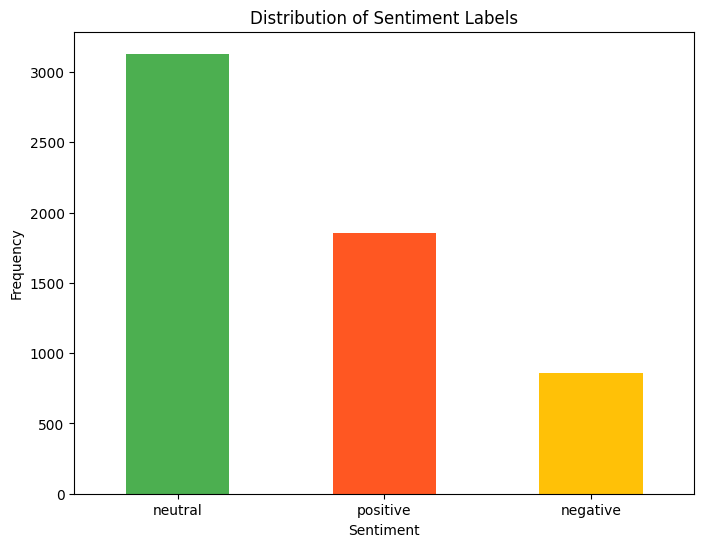

In [10]:
# Visualization of sentiment distribution
plt.figure(figsize=(8,6))
df["Sentiment"].value_counts().plot(kind="bar", color=['#4CAF50', '#FF5722', '#FFC107'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [12]:
# text data exploration
# adding another column for text length 
df2["length"] = df2["Sentence"].apply(len)
print(df2.head())

                                            Sentence Sentiment  length
0  The GeoSolutions technology will leverage Bene...  positive     218
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative      55
2  For the last quarter of 2010 , Componenta 's n...  positive     193
3  According to the Finnish-Russian Chamber of Co...   neutral     128
4  The Swedish buyout firm has sold its remaining...   neutral     135


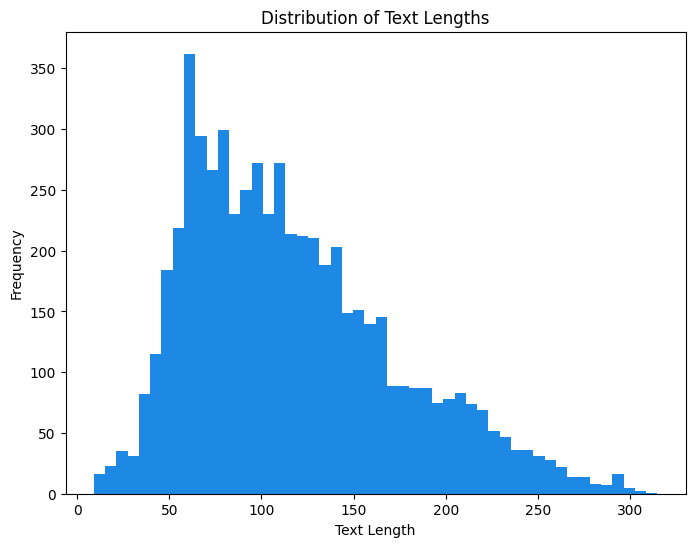

In [13]:
# Visualize text length distribution
plt.figure(figsize=(8, 6))
plt.hist(df2["length"], bins=50, color='#1E88E5')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

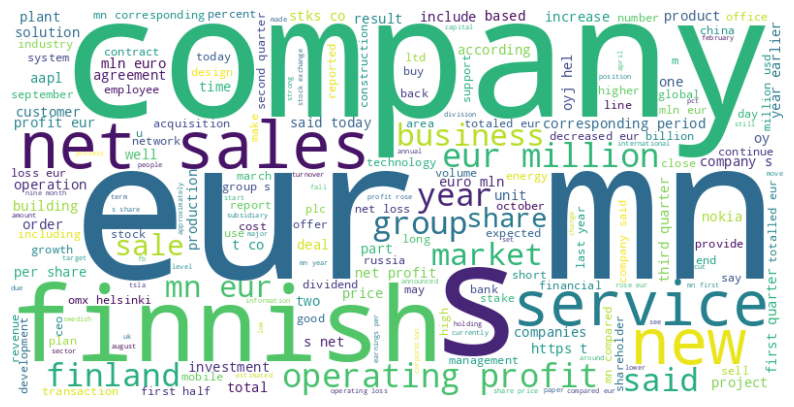

In [14]:
# checking most common words

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = ' '.join(df['Sentence']).lower().split()
filtered_words = [word for word in words if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# checking for duplicates 
print(df2.duplicated().sum())
# there are not duplicates soo no need to remove them

# checking for outliers
print(df2["length"].describe())

6
count    5842.000000
mean      117.022253
std        56.420425
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: length, dtype: float64


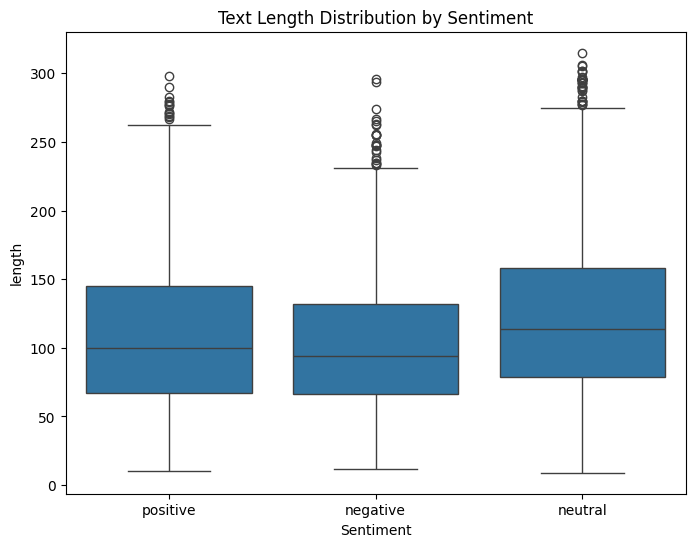

In [18]:
# Checking sentiment distribution by length
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='length', data=df2)
plt.title('Text Length Distribution by Sentiment')
plt.show()